In [2]:
import numpy as np
import pandas as pd

### Data PreProcessing

In [3]:
df = pd.read_csv("total_cloth.csv", encoding='cp949')
df.describe()

,Code,Price,Rate,Size,Brightness,Color,Thickness,Tacktile
count,3.570000e+02,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,1.134513e+06,73857.422969,92.904818,55.581232,48.742297,60.715686,53.177871,58.915966
std,2.393550e+05,35177.828853,2.985391,19.722345,14.878704,17.945641,23.555454,22.626578
min,1.292670e+05,29000.000000,76.240000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.024871e+06,52000.000000,91.680000,50.000000,46.500000,57.000000,44.500000,50.000000
50%,1.149214e+06,65000.000000,93.040000,57.000000,50.000000,62.000000,52.000000,62.500000
75%,1.305381e+06,89000.000000,94.600000,65.000000,54.500000,70.000000,69.000000,73.500000
max,1.497800e+06,320000.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [4]:
df = df[df.Size != 0]
df = df[df.Brightness != 0]
df = df[df.Color != 0]
df = df[df.Thickness != 0]
df = df[df.Tacktile != 0]
df = df

In [5]:
corr_df = df[['Price', 'Rate', 'Size', 'Brightness', 'Color', 'Thickness', 'Tacktile']]
corr_df

,Price,Rate,Size,Brightness,Color,Thickness,Tacktile
0,139000,92.28,75.5,46.0,59.5,81.0,47.5
1,45000,92.22,59.0,50.5,61.5,52.5,64.0
2,84900,96.06,56.0,53.5,60.5,51.5,77.5
3,45000,92.22,59.0,50.5,61.5,52.5,64.0
4,62000,91.68,64.5,51.0,71.0,70.5,72.5
...,...,...,...,...,...,...,...
351,87000,93.00,100.0,50.0,50.0,100.0,50.0
352,98000,94.00,75.0,75.0,75.0,100.0,87.5
353,79000,94.00,75.0,50.0,75.0,50.0,50.0
355,44000,86.00,57.0,35.5,71.5,57.0,78.5


In [23]:
index = []
for i in range(len(corr_df)):
    index.append(i)
corr_df['number'] = index

<ipython-input-23-4b380bf61f5a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['number'] = index


In [24]:
corr_df.head()

,Price,Rate,Size,Brightness,Color,Thickness,Tacktile,number
0,139000,92.28,75.5,46.0,59.5,81.0,47.5,0
1,45000,92.22,59.0,50.5,61.5,52.5,64.0,1
2,84900,96.06,56.0,53.5,60.5,51.5,77.5,2
3,45000,92.22,59.0,50.5,61.5,52.5,64.0,3
4,62000,91.68,64.5,51.0,71.0,70.5,72.5,4


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

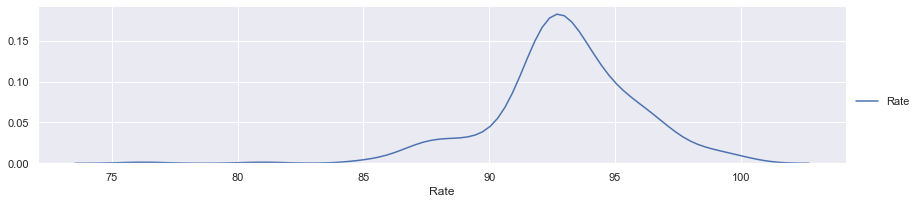

In [7]:
facet = sns.FacetGrid(corr_df, aspect = 4)
facet.map(sns.kdeplot, 'Rate')
facet.add_legend()

plt.show()

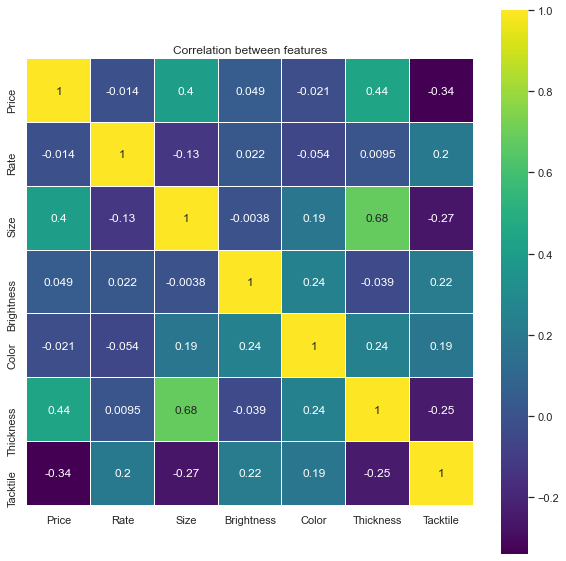

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

In [9]:
corr_df['Rate'].describe()

count    329.000000
mean      92.981824
std        2.881208
min       76.240000
25%       91.860000
50%       93.080000
75%       94.600000
max      100.000000
Name: Rate, dtype: float64

In [25]:
corr_df.head()

,Price,Rate,Size,Brightness,Color,Thickness,Tacktile,number
0,139000,92.28,75.5,46.0,59.5,81.0,47.5,0
1,45000,92.22,59.0,50.5,61.5,52.5,64.0,1
2,84900,96.06,56.0,53.5,60.5,51.5,77.5,2
3,45000,92.22,59.0,50.5,61.5,52.5,64.0,3
4,62000,91.68,64.5,51.0,71.0,70.5,72.5,4


### Dataset

In [33]:
train_data = corr_df.drop(['number'], axis=1)
target_data = corr_df['number']
print(train_data.shape, target_data.shape)

(329, 7) (329,)


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size = 0.2)

print(train_data.shape, x_train.shape, x_test.shape)

(329, 7) (263, 7) (66, 7)


In [36]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100)

In [37]:
forest.fit(x_train, y_train)
print("training set accuracy: ",forest.score(x_train, y_train))

training set accuracy:  0.77140631485101


In [40]:
y_predict = forest.predict(x_test)
print('test set accuracy:', forest.score(x_test, y_test))

test set accuracy: 0.35972670207249335
